In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


url = "/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv"
data = pd.read_csv(url)


In [ ]:
def plot_cf_matrix(y_test, y_pred, target_names):
    cf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
    df_matrix_df = pd.DataFrame(cf_matrix,index = target_names, columns = target_names)
    sns.heatmap(df_matrix_df, annot=True, cmap='RdYlBu', linewidth=.5, fmt='g', cbar=False)
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    
target_names = ['No Churn', 'Churn']

In [ ]:
print("特徵類型表格：")
print(data.dtypes)

特徵類型表格：
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [ ]:

print("數據的形狀（行數和列數）：", data.shape)


print("\n前五行數據：")
print(data.head())

數據的形狀（行數和列數）： (7043, 21)

前五行數據：
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV Str

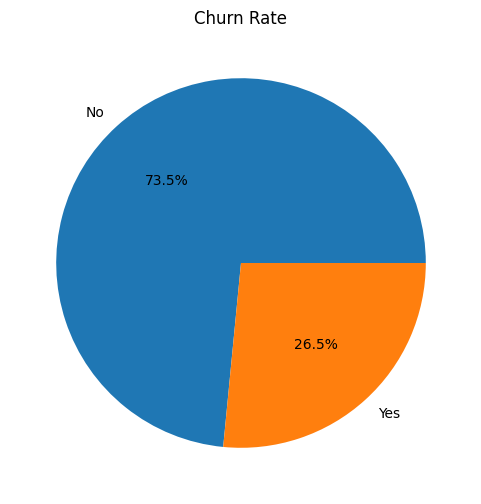

In [ ]:
# 繪製Churn比例的圓餅圖
churn_counts = data["Churn"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct="%1.1f%%")
plt.title("Churn Rate")
plt.show()


<ipython-input-5-d76f5fd7cc90>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")


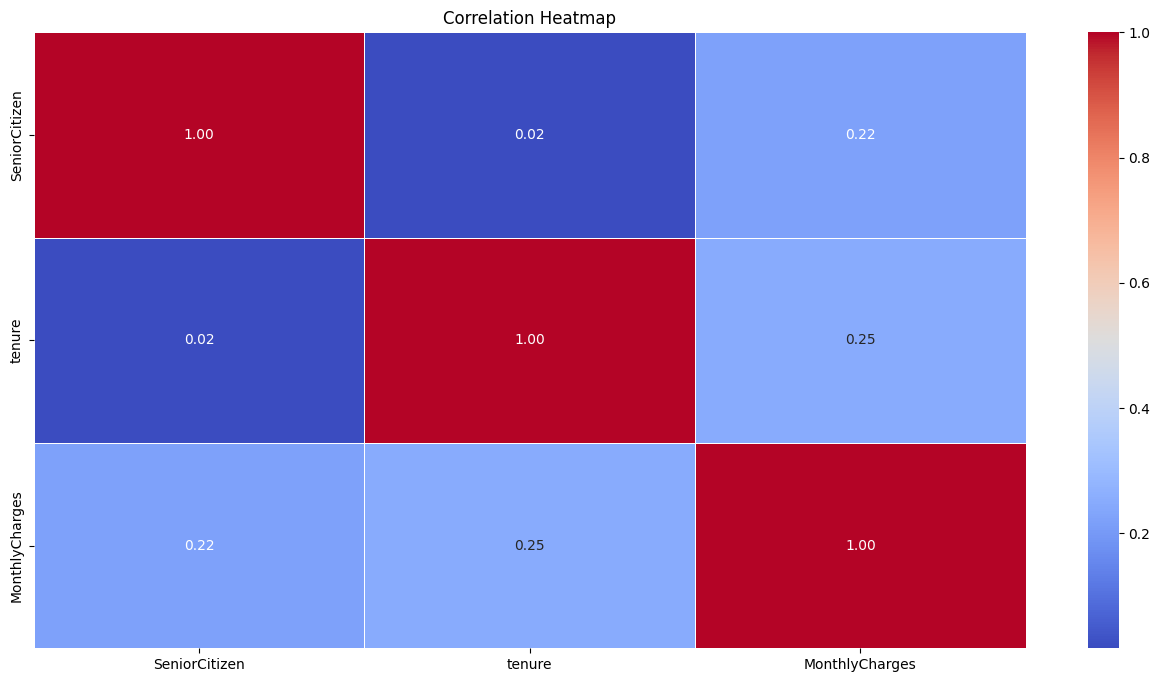

In [ ]:
# 繪製特徵之間的相關性熱力圖
plt.figure(figsize=(16, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:


for column in data.columns:
    if data[column].dtype == object:
        encoder = LabelEncoder()
        data[column] = encoder.fit_transform(data[column])

In [ ]:
X = data.drop(["Churn",'customerID'], axis=1)
y = data["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.feature_selection import chi2

In [ ]:
chi2, p_value = chi2(X_train, y_train)

In [ ]:
chi_df = pd.DataFrame({ 'chi-squares test': chi2, 'p-value':p_value})
chi_df['p-value'] = chi_df['p-value'].round(4)
chi_df = chi_df.sort_values('chi-squares test', ascending=False)
chi_df.style.background_gradient(cmap='Blues')

,chi-squares test,p-value
4,12349.737573,0.000000
17,2795.912582,0.000000
18,2234.827250,0.000000
14,873.211647,0.000000
8,439.328373,0.000000
11,407.908476,0.000000
9,177.543358,0.000000
10,144.973153,0.000000
3,104.146764,0.000000
1,102.275240,0.000000


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

chi2Filter = SelectKBest(chi2, k=8)
chi2Filter.fit(X_train, y_train)

# 選取完的 top 20 特徵
X_train_new = chi2Filter.transform(X_train)
X_test_new = chi2Filter.transform(X_test)

In [ ]:
chi2Filter.get_feature_names_out()

array(['tenure', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'Contract', 'MonthlyCharges', 'TotalCharges'],
      dtype=object)

In [ ]:
from sklearn.svm import SVC


rf = RandomForestClassifier(random_state=42)

rf.fit(X_train_new, y_train)

chi2_select_pred_20 = rf.predict(X_test_new)

report = classification_report(y_test, chi2_select_pred_20)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1036
           1       0.64      0.49      0.55       373

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.67      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409



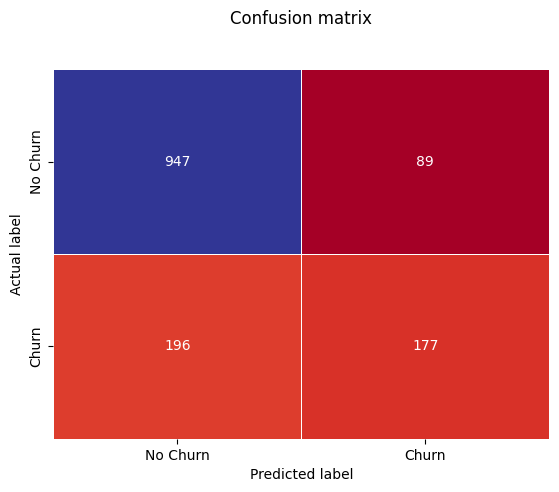

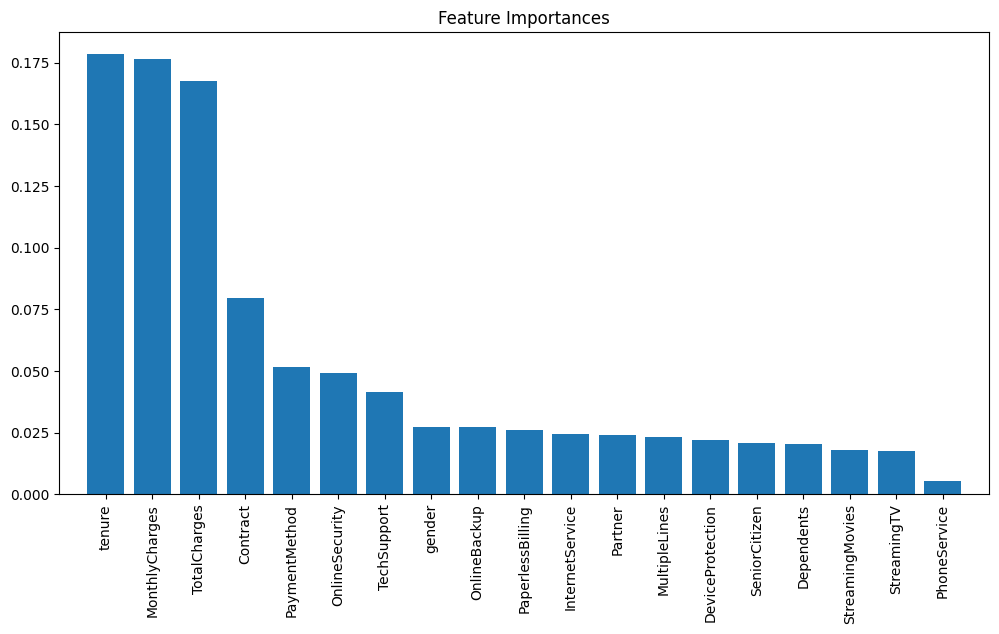

In [ ]:

rf_classifier = RandomForestClassifier(random_state=42)


param_grid = {
    "n_estimators": [50, 100, 200, 300],
    #"max_depth": [3, 5, 7, 9, None],
    #"min_samples_split": [2, 5, 10, 20],
    #"min_samples_leaf": [1, 5, 10, 20],
    #"max_features": ["auto", "sqrt", "log2", None]
}


random_search = RandomizedSearchCV(rf_classifier, param_grid, n_iter=20, cv=3, scoring="accuracy", random_state=42)
random_search.fit(X_train, y_train)


best_model = random_search.best_estimator_


y_pred = best_model.predict(X_test)


report = classification_report(y_test, y_pred)
print(report)

plot_cf_matrix(y_test, y_pred, target_names)

importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1036
           1       0.61      0.63      0.62       373

    accuracy                           0.79      1409
   macro avg       0.74      0.74      0.74      1409
weighted avg       0.80      0.79      0.79      1409

決策樹混淆矩陣：


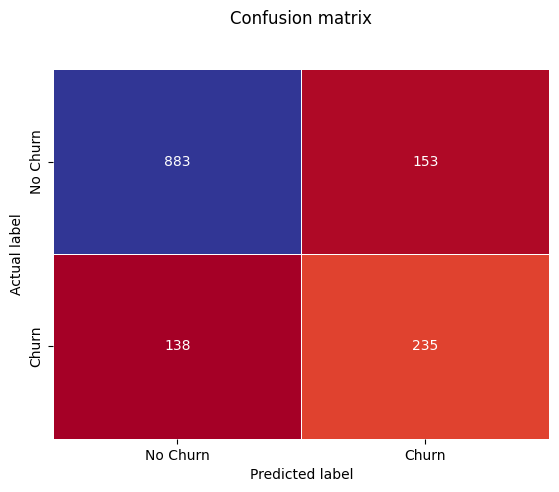

In [ ]:

dt_classifier = DecisionTreeClassifier(random_state=42)


param_grid = {
    "max_depth": [3, 5, 7, 9, None],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 5, 10, 20],
    "max_features": ["auto", "sqrt", "log2", None]
}


random_search = RandomizedSearchCV(dt_classifier, param_grid, n_iter=20, cv=3, scoring="accuracy", random_state=42)
random_search.fit(X_train, y_train)


best_model = random_search.best_estimator_


y_pred = best_model.predict(X_test)


report = classification_report(y_test, y_pred)
print(report)


plot_cf_matrix(y_test, y_pred, target_names)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.88      1036
           1       0.68      0.53      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



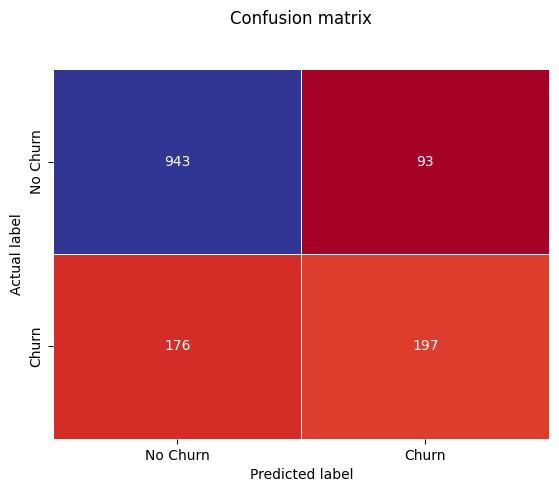

In [ ]:


xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)


param_grid = {
    "n_estimators": [50, 100, 200, 300],
    #"max_depth": [3, 5, 7, 9],
    #"learning_rate": [0.01, 0.05, 0.1, 0.2],
    #"subsample": [0.5, 0.75, 1],
    #"colsample_bytree": [0.5, 0.75, 1]
}


random_search = RandomizedSearchCV(xgb_classifier, param_grid, n_iter=20, cv=3, scoring="accuracy", random_state=42)
random_search.fit(X_train, y_train)


best_random_model = random_search.best_estimator_


y_pred = best_random_model.predict(X_test)


report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

plot_cf_matrix(y_test, y_pred, target_names)